# 1.Imports 

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

2023-11-13 00:16:45.253411: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 00:16:45.253445: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 00:16:45.253475: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-13 00:16:45.260062: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.random.set_seed(123)
np.random.seed(123)

# 2.Loading data

In [3]:
base_dir='skin-disease-datasaet/train_set' 
base_dir2='skin-disease-datasaet/test_set'
IMAGE_SIZE=256
BATCH_SIZE=8

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2023-11-13 00:16:46.733738: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-13 00:16:46.738775: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-13 00:16:46.738965: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [7]:
#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    

    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
 
)

train_generator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
 
)

test_generator=test_datagen.flow_from_directory(
    base_dir2,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False, 
)

Found 924 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


# 3.CNN Architecture

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense

cnn = tf.keras.Sequential()

cnn.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(256, 256, 3)))
cnn.add(MaxPooling2D())
cnn.add(Dropout(0.5))

cnn.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Dropout(0.5))

cnn.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Dropout(0.5))
cnn.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(tf.keras.layers.Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(tf.keras.layers.Dense(8, activation='softmax'))


2023-11-13 00:16:46.809280: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-13 00:16:46.809589: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-13 00:16:46.809751: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [10]:
import tensorflow as tf

def precision(y_true, y_pred):
    true_positives = tf.math.reduce_sum(tf.math.round(tf.math.multiply(y_true, y_pred)))
    predicted_positives = tf.math.reduce_sum(tf.math.round(y_pred))
    return true_positives / (predicted_positives + tf.keras.backend.epsilon())

def recall(y_true, y_pred):
    true_positives = tf.math.reduce_sum(tf.math.round(tf.math.multiply(y_true, y_pred)))
    actual_positives = tf.math.reduce_sum(y_true)
    return true_positives / (actual_positives + tf.keras.backend.epsilon())

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * ((prec * rec) / (prec + rec + tf.keras.backend.epsilon()))

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 128)       0

# 4. training the model

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_path = "cnn2.h5"

checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=False)
early_stopping = EarlyStopping(monitor='val_loss', patience=80, restore_best_weights=True)

cnn.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy', precision, recall, f1_score]
)

hist = cnn.fit(train_generator, epochs=120, validation_data=test_generator, callbacks=[checkpoint, early_stopping])

Epoch 1/120


2023-11-13 00:16:47.615078: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-11-13 00:16:47.737161: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-13 00:16:47.838098: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-13 00:16:48.054091: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-13 00:16:48.567159: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fc1d849a1d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-13 00:16:48.567189: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute C

116/116 [==============================] - ETA: 0s - loss: 2.0738 - accuracy: 0.1429 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00
Epoch 1: saving model to cnn2.h5
116/116 [==============================] - 5s 15ms/step - loss: 2.0738 - accuracy: 0.1429 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 2.0697 - val_accuracy: 0.1416 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/120
 13/116 [==>...........................] - ETA: 0s - loss: 2.0047 - accuracy: 0.2200 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00

/home/zeyd/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/116 [===========================>..] - ETA: 0s - loss: 2.0655 - accuracy: 0.1427 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00
Epoch 2: saving model to cnn2.h5
116/116 [==============================] - 1s 10ms/step - loss: 2.0656 - accuracy: 0.1439 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 2.0630 - val_accuracy: 0.1459 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/120
110/116 [===========================>..] - ETA: 0s - loss: 2.0336 - accuracy: 0.1473 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00
Epoch 3: saving model to cnn2.h5
116/116 [==============================] - 1s 10ms/step - loss: 2.0363 - accuracy: 0.1483 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 2.0099 - val_accuracy: 0.1631 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 4/120
111/116 [===========================>..] - E

In [13]:
# Access and print the metrics for the last epoch
last_epoch = len(hist.history['loss'])  # Find the index of the last epoch

# Define the metric names
metric_names = ['loss', 'accuracy', 'precision', 'recall', 'f1_score']

# Print the metric values for the last epoch
for metric_name in metric_names:
    last_value = hist.history[metric_name][last_epoch - 1]
    print(f"{metric_name}: {last_value:.4f}")

loss: 0.1712
accuracy: 0.9481
precision: 0.9510
recall: 0.9418
f1_score: 0.9461


In [14]:
last_epoch = len(hist.history['loss']) - 1 


metric_names = ['loss', 'accuracy', 'precision', 'recall', 'f1_score']

for metric_name in metric_names:
    training_value = hist.history[metric_name][last_epoch]
    validation_value = hist.history[f'val_{metric_name}'][last_epoch]
    print(f"{metric_name}:")
    print(f"  Training: {training_value:.4f}")
    print(f"  Validation: {validation_value:.4f}")

loss:
  Training: 0.1712
  Validation: 1.2469
accuracy:
  Training: 0.9481
  Validation: 0.7554
precision:
  Training: 0.9510
  Validation: 0.7780
recall:
  Training: 0.9418
  Validation: 0.7583
f1_score:
  Training: 0.9461
  Validation: 0.7675


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


y_pred = cnn.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.labels

confusion = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)

report = classification_report(y_true, y_pred)

print("Classification Report:")
print(report)


30/30 [==============================] - 0s 6ms/step
Confusion Matrix:
[[18  1  5  4  0  1  1  3]
 [ 0 17  0  0  2  0  0  1]
 [ 1  3 26  1  0  0  0  1]
 [ 1  6  3 19  0  2  1  1]
 [ 1  1  0  2 16  3  0  0]
 [ 0  0  0  3  0 21  0  1]
 [ 0  1  0  0  0  2 31  0]
 [ 0  0  1  0  2  2  0 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.55      0.67        33
           1       0.59      0.85      0.69        20
           2       0.74      0.81      0.78        32
           3       0.66      0.58      0.61        33
           4       0.80      0.70      0.74        23
           5       0.68      0.84      0.75        25
           6       0.94      0.91      0.93        34
           7       0.80      0.85      0.82        33

    accuracy                           0.76       233
   macro avg       0.76      0.76      0.75       233
weighted avg       0.77      0.76      0.75       233



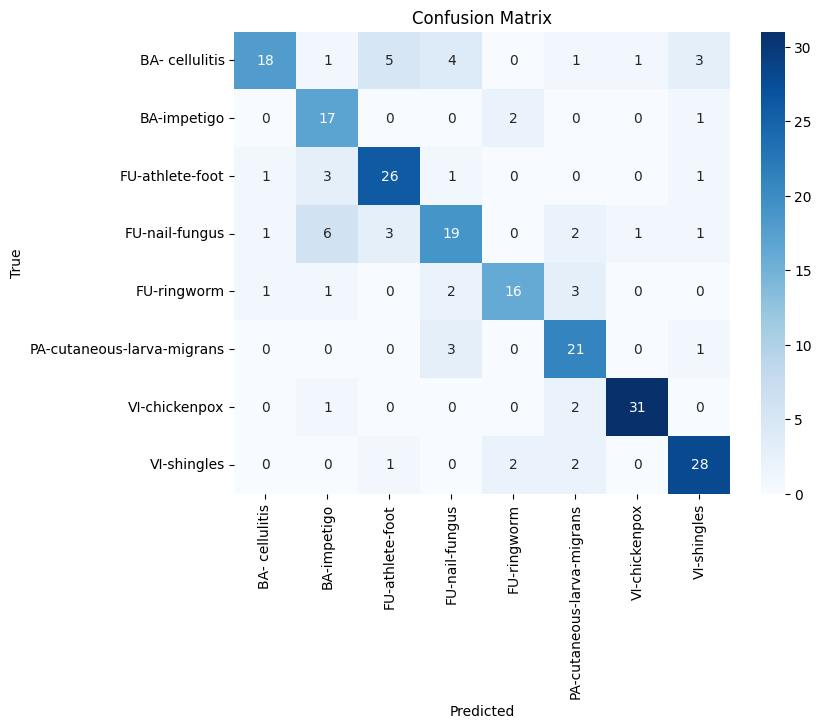

In [16]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [17]:
from matplotlib import pyplot as plt

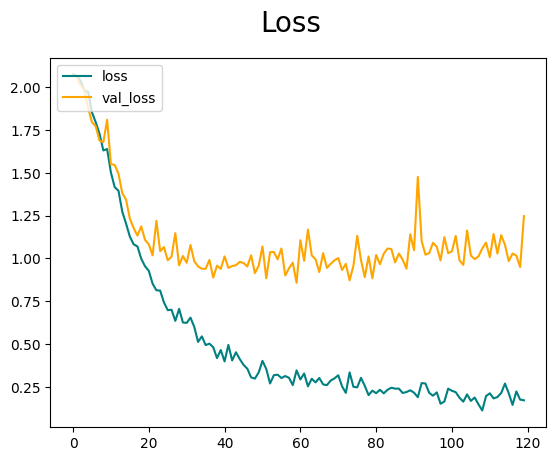

In [18]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

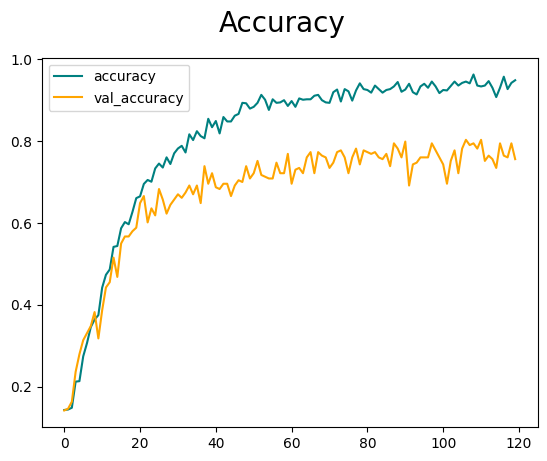

In [19]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()